In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt



In [2]:
shark = pd.read_csv('~/Documentos/projecto-pandas/GSAF5.csv', engine="python")


In [3]:
display(shark.head())


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
shark_file = shark [["Date", "Year", "Type", "Country", "Area", "Location", "Activity", "Sex ", "Age", "Injury", "Fatal (Y/N)", "original order"]]


In [5]:
shark_file['Sex '].value_counts()

M      4835
F       585
M         2
.         1
N         1
lli       1
Name: Sex , dtype: int64

## TRANSFORM FATALS

In [6]:
def transform_fatal(x):
    if x=='UNKNOWN' or x=='#VALUE!': return np.nan
    elif x==' N' or x=='n' or x=='N 'or x=='F': return 'NO'
    elif x=='N': return 'NO'
    elif x=='Y': return 'YES'


In [7]:
shark_file['Fatal (Y/N)']=shark_file['Fatal (Y/N)'].apply(transform_fatal)


/home/jjespper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
shark_file['Fatal (Y/N)'].value_counts()

NO     4326
YES    1552
Name: Fatal (Y/N), dtype: int64

## TRANSFORM SEXS

In [9]:
shark_file['Fatal (Y/N)'].value_counts()

NO     4326
YES    1552
Name: Fatal (Y/N), dtype: int64

In [10]:
def transform_sex(x):
    if x=='M ' or x=='N' or x=="M": return 'M'
    elif x=='F': return "F" 
    

In [11]:
shark_file['Sex ']=shark_file['Sex '].apply(transform_sex)

shark_file["Sex "].value_counts()

/home/jjespper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


M    4838
F     585
Name: Sex , dtype: int64

## TRANSFORM TYPE

In [12]:
def transform_type(x):
    if x=='Boat' or x=='Boating' or x=="Sea Disaster": return np.nan
    elif x=='Invalid': return np.nan
    elif x=='Provoked': return 'Provoked'
    elif x=='Unprovoked': return 'Unprovoked'

In [13]:
shark_file['Type']=shark_file['Type'].apply(transform_type)

/home/jjespper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## DROP NaNs FATAL & SEX

In [14]:
shark_1= shark_file.dropna(subset=['Fatal (Y/N)', 'Sex '])

In [15]:
shark_1.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),original order
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,NO,5993
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,NO,5992
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,NO,5991
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,NO,5990
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,NO,5989


In [16]:
shark_1.isnull().sum()

Date                 0
Year                 0
Type               682
Country             37
Area               335
Location           418
Activity           348
Sex                  0
Age               2104
Injury               0
Fatal (Y/N)          0
original order       0
dtype: int64

In [17]:
shark_1.shape

(5356, 12)

In [18]:
shark_w = shark_1 [["Type", "Sex ", "Fatal (Y/N)", "Year"]]

In [19]:
shark_w.head()

,Type,Sex,Fatal (Y/N),Year
0,Unprovoked,M,NO,2016
1,Unprovoked,M,NO,2016
2,Unprovoked,M,NO,2016
3,Unprovoked,M,NO,2016
4,Unprovoked,M,NO,2016


## SELECTING YEARS

In [20]:
shark_w_year = shark_w.query('2001 <= Year <= 2016')

display(shark_w_year.head())


,Type,Sex,Fatal (Y/N),Year
0,Unprovoked,M,NO,2016
1,Unprovoked,M,NO,2016
2,Unprovoked,M,NO,2016
3,Unprovoked,M,NO,2016
4,Unprovoked,M,NO,2016


In [21]:
shark_w_year['Fatal (Y/N)'].value_counts()

NO     1490
YES     179
Name: Fatal (Y/N), dtype: int64

In [22]:
#%matplotlib inline
#shark_w[shark_w["Sex "]=="F"].groupby(["Type"]).mean()["Fatal (Y/N)"].plot()

## DROP MALE


In [23]:
shark_w_year_female = shark_w_year.drop(shark_w_year[shark_w_year["Sex "]== 'M'].index)

## DROP FEMALE

In [24]:
shark_w_year_male = shark_w_year.drop(shark_w_year[shark_w_year["Sex "]== 'F'].index)

## DROP YES FATAL

In [25]:
shark_w_year_nodied = shark_w_year.drop(shark_w_year[shark_w_year["Fatal (Y/N)"]== 'YES'].index)

## DROP NO FATAL

In [26]:
shark_w_year_yesdied = shark_w_year.drop(shark_w_year[shark_w_year["Fatal (Y/N)"]== 'NO'].index)

## DROP PROVOKED


In [27]:
shark_w_year_unprovoked = shark_w_year.drop(shark_w_year[shark_w_year["Type"]== 'Provoked'].index)

## DROP UNPROVOKED

In [28]:
shark_w_year_provoked = shark_w_year.drop(shark_w_year[shark_w_year["Type"]== 'Unprovoked'].index)

## CLEAN COLUMN FATAL NO DIED

In [29]:
shark_w_year_nodied.drop(['Fatal (Y/N)'], axis =1, inplace=True)

## CLEAN COLUMN FATAL YES DIED

In [30]:
shark_w_year_yesdied.drop(['Fatal (Y/N)'], axis =1, inplace=True)

## DROP MALES NO FATAL

In [31]:
shark_w_year_nodied_female = shark_w_year_nodied.drop(shark_w_year_nodied[shark_w_year_nodied['Sex ']== 'M'].index)

## DROP FEMALE NO FATAL

In [32]:
shark_w_year_nodied_male = shark_w_year_nodied.drop(shark_w_year_nodied[shark_w_year_nodied['Sex ']== 'F'].index)

## DROP MALE YES FATAL

In [33]:
shark_w_year_yesdied_female = shark_w_year_yesdied.drop(shark_w_year_yesdied[shark_w_year_yesdied['Sex ']== 'M'].index)

## DROP FEMALE YES FATAL

In [34]:
shark_w_year_yesdied_male = shark_w_year_yesdied.drop(shark_w_year_yesdied[shark_w_year_yesdied['Sex ']== 'F'].index)

## MUJERES QUE NO HAN MUERTO

In [35]:
shark_w_year_nodied_female.groupby('Type').count()
#shark_w.groupby('Fatal (Y/N)').count()


,Sex,Year
Type,,
Provoked,8,8
Unprovoked,226,226


In [36]:
%matplotlib inline


In [37]:
#shark_w_nodied_male[shark_w_nodied_male["Sex "]=="F"].groupby(["Type"]).mean()["Sex "].plot()

## PORCENTAJE DE H/M QUE NO HAN MUERTO

In [38]:
shark_w_year_nodied["Sex "].value_counts(normalize=True)*100

M    82.751678
F    17.248322
Name: Sex , dtype: float64

## CROSSING TABLES

In [39]:
pd.crosstab(shark_w_year['Type'], shark_w_year['Sex '])

Sex,F,M
Type,,
Provoked,8,131
Unprovoked,244,1109


In [40]:
#pd.crosstab(df.A,df.B)

In [41]:
pd.crosstab(shark_w_year['Type'], shark_w_year['Sex ']).apply(lambda r: r/r.sum(), axis=1)*100

Sex,F,M
Type,,
Provoked,5.755396,94.244604
Unprovoked,18.033999,81.966001


In [42]:
shark_w_year["Fatal (Y/N)"].value_counts(normalize=True)*100

NO     89.275015
YES    10.724985
Name: Fatal (Y/N), dtype: float64

In [43]:
shark_w_year['Sex '].value_counts(normalize=True)*100

M    83.283403
F    16.716597
Name: Sex , dtype: float64

In [44]:
shark_w_year_female['Type'].value_counts(normalize=True)*100

Unprovoked    96.825397
Provoked       3.174603
Name: Type, dtype: float64

In [45]:
shark_w_year_male['Type'].value_counts(normalize=True)*100

Unprovoked    89.435484
Provoked      10.564516
Name: Type, dtype: float64

In [46]:
shark_w_year_unprovoked['Sex '].value_counts(normalize=True)*100

M    82.287582
F    17.712418
Name: Sex , dtype: float64

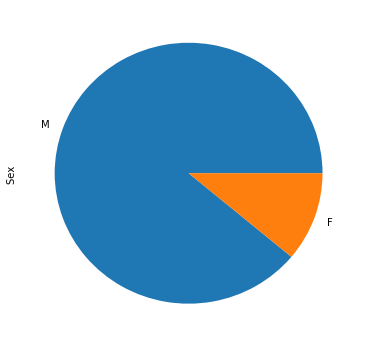

In [47]:
(shark_w_year_provoked['Sex '].value_counts(normalize=True)*100).plot.pie(figsize=[6,6])

In [48]:
#In [79]: df.plot.pie(subplots=True, figsize=(8, 4))
